<a href="https://www.kaggle.com/code/mustafacihadgoktepe/mushroom-random-forest?scriptVersionId=107684898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [23]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
pd.set_option('display.max_columns', 50)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [25]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [26]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

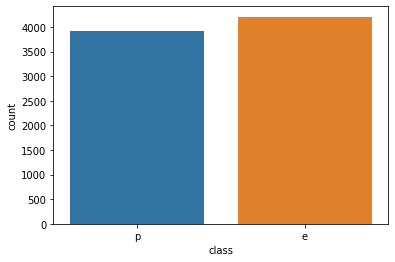

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=data['class']);

In [28]:
data.drop('veil-type', axis=1, inplace=True)

In [29]:
from sklearn.model_selection import train_test_split

X = data.drop('class', axis=1)
y = pd.DataFrame(data['class'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,
                                                      test_size=0.2, random_state=42, stratify = y)

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train_OE = ordinal_encoder.fit_transform(X_train)
X_valid_OE = ordinal_encoder.transform(X_valid)

X_train_OE = pd.DataFrame(X_train_OE, columns=X_train.columns)
X_valid_OE = pd.DataFrame(X_valid_OE, columns=X_valid.columns)

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_LE = label_encoder.fit_transform(y_train)
y_valid_LE = label_encoder.transform(y_valid)

y_train_LE = pd.DataFrame(y_train_LE, columns=y_train.columns)
y_valid_LE = pd.DataFrame(y_valid_LE, columns=y_valid.columns)

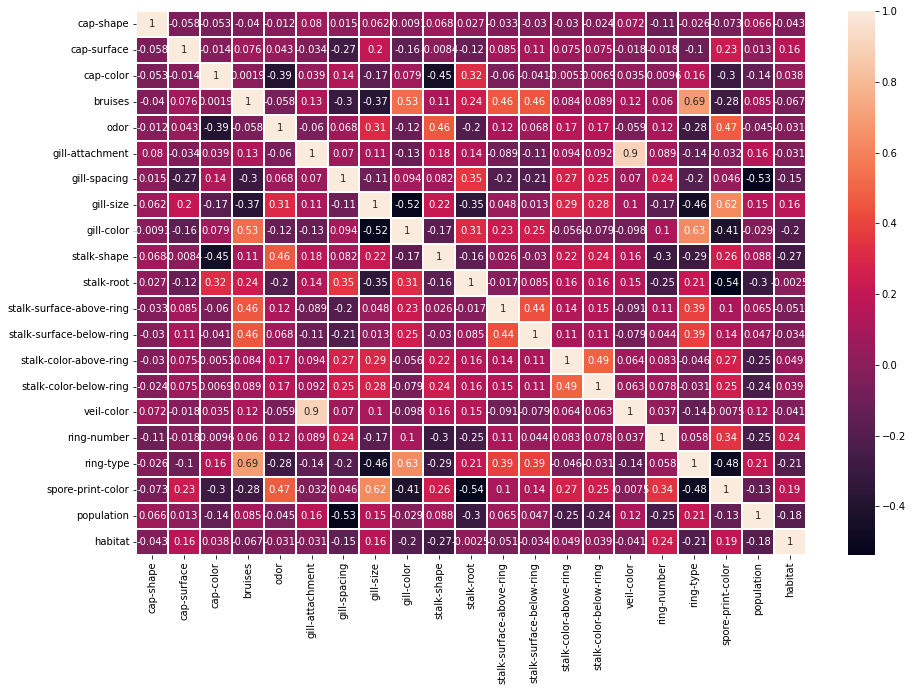

In [32]:
plt.figure(figsize = (15,10))
sns.heatmap(X_train_OE.corr(), annot=True, linewidths=0.2);

In [33]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X_train_OE, y_train_LE), columns=['MI Scores'],
                  index=X_train_OE.columns)
corr = pd.DataFrame(X_train_OE.corrwith(y_train_LE['class']), columns=['Correlation'])
s_corr = pd.DataFrame(X_train_OE.corrwith(y_train_LE['class'], method='spearman'),
                      columns=['Spearman_Correlation'])

relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
odor,0.640401,-0.103750,-0.129756
spore-print-color,0.327830,0.164141,-0.017118
gill-color,0.299660,-0.528905,-0.529953
ring-type,0.224570,-0.409313,-0.432878
stalk-surface-above-ring,0.204476,-0.346465,-0.440616
stalk-surface-below-ring,0.198668,-0.304028,-0.394729
stalk-color-below-ring,0.166656,-0.144807,-0.166111
stalk-color-above-ring,0.165707,-0.156374,-0.182406
gill-size,0.151774,0.532492,0.532492
population,0.144204,0.300369,0.223723


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
lsvc = LinearSVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
sgdc = SGDClassifier()
gbc = GradientBoostingClassifier()

models = [dtc, lr, gnb, lsvc, rfc,  knn, sgdc, gbc]
model_name = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Linear SVC', 
              'Random Forest', 'KNN or k-Nearest Neighbors', 'Stochastic Gradient Descent',
              'Gradient Boosting Classifier']

acc_scores = []
for model in models:
    model.fit(X_train_OE, y_train_LE)
    y_pred = model.predict(X_valid_OE)
    acc_model = round(accuracy_score(y_pred, y_valid_LE) * 100, 2)
    acc_scores.append(acc_model)

In [35]:
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending=False)

,Model name,Accuracy scores
0,Decision Tree,100.00
4,Random Forest,100.00
7,Gradient Boosting Classifier,100.00
5,KNN or k-Nearest Neighbors,99.69
1,Logistic Regression,95.75
3,Linear SVC,95.20
2,Gaussian Naive Bayes,92.86
6,Stochastic Gradient Descent,91.75


In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
cv_mean_scores = []
for model in models:
    scores = cross_val_score(model, X_train_OE, y_train_LE, cv=cv, scoring='accuracy')
    cv_mean_scores.append(scores.mean()*100)

In [37]:
models_val = pd.DataFrame({'Model name': model_name, 'Cross validation mean scores': cv_mean_scores})
models_val = models_val.sort_values(by='Cross validation mean scores', ascending=False)
models_val

,Model name,Cross validation mean scores
0,Decision Tree,100.000000
4,Random Forest,100.000000
7,Gradient Boosting Classifier,100.000000
5,KNN or k-Nearest Neighbors,99.728174
1,Logistic Regression,94.676078
3,Linear SVC,94.630059
6,Stochastic Gradient Descent,93.517041
2,Gaussian Naive Bayes,91.624394


In [38]:
rfc.fit(X_train_OE, y_train_LE)
y_pred = rfc.predict(X_valid_OE)
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [39]:
rfc.predict_proba(X_valid_OE)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [40]:
y_pred_inversed = label_encoder.inverse_transform(y_pred)
y_pred_inversed

array(['p', 'p', 'e', ..., 'e', 'e', 'p'], dtype=object)

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_valid_LE, y_pred),
    recall_score(y_valid_LE, y_pred),
    f1_score(y_valid_LE, y_pred)))

Precision score is: 1.000000 
Recall score is: 1.000000 
f1 score is: 1.000000


In [42]:
from sklearn.metrics import classification_report

report_dtc = pd.DataFrame(classification_report(y_valid_LE, y_pred,
                                                output_dict=True,
                                                target_names=label_encoder.classes_))
report_dtc

,e,p,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,842.0,783.0,1.0,1625.0,1625.0


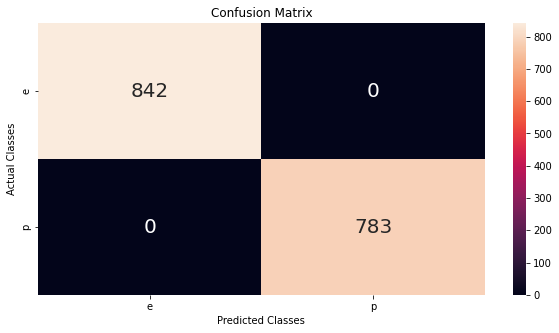

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid_LE, y_pred)
cm_dataframe = pd.DataFrame(cm, columns=label_encoder.classes_, index=label_encoder.classes_)

plt.figure(figsize=(10,5))
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={'size':20})
p.set(title='Confusion Matrix')
p.set_xlabel('Predicted Classes')
p.set_ylabel('Actual Classes');

Text(0.5, 0, 'False Positive Rate')

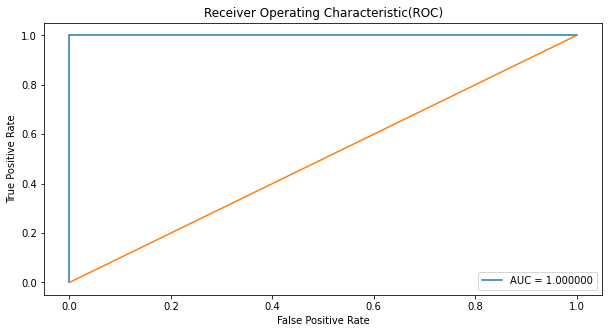

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid_LE, y_pred)
auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,5))
plt.plot(false_positive_rate, true_positive_rate, label="AUC = {:2f}".format(auc))
plt.plot([0,1], [0,1])
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC)")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

Thanks for reading.